# Explore here

In [2]:
import pandas as pd

# Configuración
file_id = '1e_DPPpXy0zddc0A1ARU4fx1hO_ZHc1Tn'
url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Carga el DataFrame con parámetros para mejor manejo de datos
try:
    df = pd.read_csv(url)
    
    # Verificación básica
    print(f"¡Archivo cargado correctamente! Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())
    
    print("\nResumen estadístico:")
    print(df.describe())
    
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    print("\nSolución alternativa:")
    print("1. Verifica que el archivo esté compartido como 'Cualquier persona con el enlace'")
    print("2. Si el archivo es muy grande, usa: df = pd.read_csv(url, chunksize=10000)")

¡Archivo cargado correctamente! Dimensiones: (48052, 2)

Primeras 5 filas:
                                        ComentarioEs sentimiento
0  Uno de los otros crÃ­ticos ha mencionado que d...    positivo
1  Una pequeÃ±a pequeÃ±a producciÃ³n.La tÃ©cnica ...    positivo
2  PensÃ© que esta era una manera maravillosa de ...    positivo
3  BÃ¡sicamente, hay una familia donde un niÃ±o p...    negativo
4  El """"amor en el tiempo"""" de Petter Mattei ...    positivo

Resumen estadístico:
                                             ComentarioEs sentimiento
count                                               48051       48051
unique                                              48051           2
top     Nadie espera que las pelÃ­culas de Star Trek s...    negativo
freq                                                    1       24041


Vamos a cambiar a unicodedata.normalize("NFKC", text) para trabajar con tildes y "ñ" en español, con un texto completamente normalizado.

In [3]:
import unicodedata

def normalize_text(text):
    if isinstance(text, str):
        # Normalizar el texto y asegurar codificación consistente
        return unicodedata.normalize("NFKC", text)
    else:
        return text  # Si no es texto, lo devuelve tal cual (evita errores en números, etc.)

# Aplicar a todas las columnas de tipo 'object' (strings)
df = df.apply(lambda col: col.map(normalize_text) if col.dtype == 'object' else col)

# Mostrar las primeras filas para verificar
df

,ComentarioEs,sentimiento
0,Uno de los otros crÃ­ticos ha mencionado que d...,positivo
1,Una pequeÃ±a pequeÃ±a producciÃ3n.La tÃ©cnica ...,positivo
2,PensÃ© que esta era una manera maravillosa de ...,positivo
3,"BÃ¡sicamente, hay una familia donde un niÃ±o p...",negativo
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",positivo
...,...,...
48047,PensÃ© que esta pelÃ­cula hizo un buen trabajo...,positivo
48048,"Mala parcela, mal diÃ¡logo, mala actuaciÃ3n, d...",negativo
48049,Soy catÃ3lica enseÃ±ada en escuelas primarias ...,negativo
48050,Voy a tener que estar en desacuerdo con el com...,negativo


Verifiquemos si tenemos un dataset balanceado

In [4]:
print(len(df[df['sentimiento']=="positivo"]))
print(len(df[df['sentimiento']=="negativo"]))

24010
24041


Eliminemos valores Nulos

In [5]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,ComentarioEs,sentimiento
0,Uno de los otros crÃ­ticos ha mencionado que d...,positivo
1,Una pequeÃ±a pequeÃ±a producciÃ3n.La tÃ©cnica ...,positivo
2,PensÃ© que esta era una manera maravillosa de ...,positivo
3,"BÃ¡sicamente, hay una familia donde un niÃ±o p...",negativo
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",positivo
...,...,...
48046,PensÃ© que esta pelÃ­cula hizo un buen trabajo...,positivo
48047,"Mala parcela, mal diÃ¡logo, mala actuaciÃ3n, d...",negativo
48048,Soy catÃ3lica enseÃ±ada en escuelas primarias ...,negativo
48049,Voy a tener que estar en desacuerdo con el com...,negativo


Transformemos nuestras dos categorias negativo y positivo en valores numéricos (0 y 1)

In [6]:
df["sentimiento"] = df["sentimiento"].apply(lambda x: 1 if x == "positivo" else 0).astype(int)
df.head()

,ComentarioEs,sentimiento
0,Uno de los otros crÃ­ticos ha mencionado que d...,1
1,Una pequeÃ±a pequeÃ±a producciÃ3n.La tÃ©cnica ...,1
2,PensÃ© que esta era una manera maravillosa de ...,1
3,"BÃ¡sicamente, hay una familia donde un niÃ±o p...",0
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",1


vamos a ajustar las tildes

In [7]:
# Diccionario de reemplazos (caracter mal codificado → caracter correcto)
reemplazos = {
    r'Ã±': 'ñ',    # ñ
    r'Ã¡': 'á',    # á
    r'Ã©': 'é',    # é
    r'Ã3': 'ó',    # ó
    r'Ã­': 'í',     # í
    r'Ãº': 'ú',    # ú 
    r'Ã¼': 'ü',    # ü (por si acaso)
    }

# Aplicar reemplazo en todas las columnas de tipo string
for columna in df.select_dtypes(include=['object']).columns:
    df[columna] = df[columna].str.replace('|'.join(reemplazos.keys()), 
                                         lambda x: reemplazos[x.group()], 
                                         regex=True)
df

,ComentarioEs,sentimiento
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,Pensé que esta era una manera maravillosa de p...,1
3,"Básicamente, hay una familia donde un niño peq...",0
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",1
...,...,...
48046,Pensé que esta película hizo un buen trabajo a...,1
48047,"Mala parcela, mal diálogo, mala actuación, dir...",0
48048,Soy católica enseñada en escuelas primarias pa...,0
48049,Voy a tener que estar en desacuerdo con el com...,0


Pasamos todo el texto a minusculas

In [8]:
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)
df

,ComentarioEs,sentimiento
0,uno de los otros críticos ha mencionado que de...,1
1,una pequeña pequeña producción.la técnica de f...,1
2,pensé que esta era una manera maravillosa de p...,1
3,"básicamente, hay una familia donde un niño peq...",0
4,"el """"""""amor en el tiempo"""""""" de petter mattei ...",1
...,...,...
48046,pensé que esta película hizo un buen trabajo a...,1
48047,"mala parcela, mal diálogo, mala actuación, dir...",0
48048,soy católica enseñada en escuelas primarias pa...,0
48049,voy a tener que estar en desacuerdo con el com...,0


Procesamiento del texto

Para poder entrenar el modelo es necesario aplicar antes un proceso de transformación al texto. ya lo tenemos en minusculas, ahora eliminaremos signos de puntuación y caracteres especiales:

In [9]:
import regex as re

def preprocess_text(text):
    # Permitir letras (incluyendo acentuadas y ñ), espacios y algunos símbolos básicos
    text = re.sub(r'[^\wáéíóúüñÁÉÍÓÚÜÑ ]', " ", text, flags=re.UNICODE)
    
    # Eliminar palabras de una sola letra rodeadas por espacios
    text = re.sub(r'\s+[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]\s+', " ", text)
    text = re.sub(r'^\s*[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]\s+', " ", text)
    text = re.sub(r'\s+[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]\s*$', " ", text)

    # Reducir espacios múltiples y convertir a minúsculas
    text = re.sub(r'\s+', " ", text.lower()).strip()
    
    # Eliminar tags (opcional, si aún es necesario)
    text = re.sub(r'&lt;/?.*?&gt;', " ", text)
    
    return text.split()

# Aplicar la función
df["ComentarioEs"] = df["ComentarioEs"].apply(preprocess_text)
df

,ComentarioEs,sentimiento
0,"[uno, de, los, otros, críticos, ha, mencionado...",1
1,"[una, pequeña, pequeña, producción, la, técnic...",1
2,"[pensé, que, esta, era, una, manera, maravillo...",1
3,"[básicamente, hay, una, familia, donde, un, ni...",0
4,"[el, amor, en, el, tiempo, de, petter, mattei,...",1
...,...,...
48046,"[pensé, que, esta, película, hizo, un, buen, t...",1
48047,"[mala, parcela, mal, diálogo, mala, actuación,...",0
48048,"[soy, católica, enseñada, en, escuelas, primar...",0
48049,"[voy, tener, que, estar, en, desacuerdo, con, ...",0


El siguiente paso es la lematización del texto, que es el proceso de simplificación de las palabras a su forma base o canónica, de manera que palabras con diferentes formas, pero el mismo núcleo semántico, se traten como una sola palabra. Por ejemplo, los verbos "corriendo", "corrió" y "corre" serán lematizados a "correr", así como las palabras "mejores" y "mejor" podrían ser lematizadas a "bueno".

In [ ]:
import spacy
from tqdm import tqdm

# Configurar tqdm para pandas
tqdm.pandas(desc="Procesando textos")

# Cargar el modelo (después de instalarlo)
nlp = spacy.load("es_core_news_sm")

def lematizar_texto_es(words):
    if isinstance(words, list):  # Asegurar que 'words' sea una lista
        doc = nlp(" ".join(words))
        tokens = [token.lemma_ for token in doc if not token.is_stop and len(token.text) > 3]
        return tokens
    return []  # Si no es una lista, devolver lista vacía

# Aplicar la función a la columna con una barra y porcentaje de progreso
df["ComentarioEs"] = df["ComentarioEs"].progress_apply(lematizar_texto_es)
df

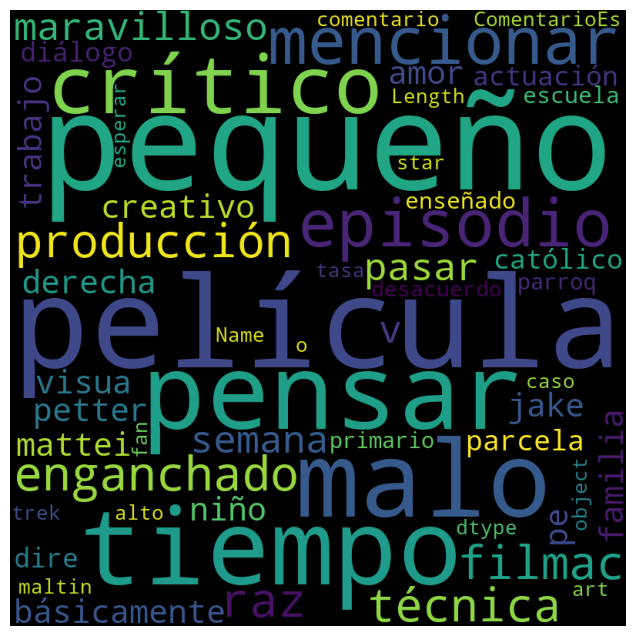

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["ComentarioEs"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ahora eliminaremos las stopwords, que son palabras que consideramos irrelevantes para el análisis de texto porque aparece con mucha frecuencia en el lenguaje y no aporta información significativa utilizando la libreria nltk y convertiremos en numeros el df para poder construir el modelo:

Utilizaremos una versión que sea optima para analisis de sentimiento de acuerdo a las siguientes observaciones:

Trabajas con texto en español (las stopwords son esenciales)

El contexto de palabras es importante (n-gramas capturan frases)

Quieres mayor granularidad (15k features vs 5k)

Prefieres eficiencia en memoria (matriz sparse)

Buscas mejor rendimiento en análisis de sentimiento (sublinear_tf ayuda)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Descargar stopwords
nltk.download('stopwords')

# Convertir stopwords a LISTA (no set)
stop_words_es = list(stopwords.words('spanish'))

# Configuración de TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=15_000,
    ngram_range=(1, 3),
    stop_words=stop_words_es,  # Ahora es una lista válida
    sublinear_tf=True
)

# Procesamiento del corpus
corpus = df["ComentarioEs"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X = tfidf.fit_transform(corpus)

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Randoom forest sin grafico

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Separar características (X) y etiquetas (y)
y = df['sentimiento']  # La columna "sentimiento" contiene las etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
random_forest_model = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=None,    # Sin límite para la profundidad
    random_state=42    # Semilla para reproducibilidad
)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = random_forest_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy del modelo Random Forest: 0.83

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4759
           1       0.85      0.81      0.83      4852

    accuracy                           0.83      9611
   macro avg       0.83      0.83      0.83      9611
weighted avg       0.83      0.83      0.83      9611



In [ ]:
primero intento se realizo un random forest con graficos y estimaror de 100 tomando 17 min en ejecutarse al 100% llegando a un accuracy de 0.83

segundo intento random forest con graficos,con estimaror de 50 incluye paralelización en el código junto a la reducción de dimensionalidad llegando a un accuracy de

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Configurar tqdm para mostrar barra de progreso en pandas
tqdm.pandas(desc="Procesando textos")

# Aplicar la función de lematización con barra de progreso
df["ComentarioEs"] = df["ComentarioEs"].progress_apply(lematizar_texto_es)

# Reducción de dimensionalidad ajustando TF-IDF (max_features)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=10_000,  # Reducimos el número máximo de características a 10,000
    ngram_range=(1, 3),
    stop_words=stop_words_es,  # Stopwords en español
    sublinear_tf=True
)
corpus = df["ComentarioEs"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X = tfidf.fit_transform(corpus)

# Separar características (X) y etiquetas (y)
y = df['sentimiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest con paralelización
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)  # Reducimos n_estimators a 50
model.fit(X_train, y_train)

# Visualización de los primeros árboles (simplificados)
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
tree.plot_tree(model.estimators_[0], ax=axis[0, 0], feature_names=tfidf.get_feature_names_out(), class_names=["negativo", "positivo"], filled=True)
tree.plot_tree(model.estimators_[1], ax=axis[0, 1], feature_names=tfidf.get_feature_names_out(), class_names=["negativo", "positivo"], filled=True)
tree.plot_tree(model.estimators_[2], ax=axis[1, 0], feature_names=tfidf.get_feature_names_out(), class_names=["negativo", "positivo"], filled=True)
tree.plot_tree(model.estimators_[3], ax=axis[1, 1], feature_names=tfidf.get_feature_names_out(), class_names=["negativo", "positivo"], filled=True)
plt.show()

# Predicciones
y_pred = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest: {accuracy:.2f}")

Procesando textos: 100%|██████████| 48051/48051 [13:43<00:00, 58.37it/s]


: 

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Configurar tqdm para mostrar barra de progreso en pandas
tqdm.pandas(desc="Procesando textos")

# Aplicar la función de lematización con barra de progreso
df["ComentarioEs"] = df["ComentarioEs"].progress_apply(lematizar_texto_es)

# Reducción de dimensionalidad ajustando TF-IDF (max_features)
tfidf = TfidfVectorizer(
    max_features=10_000,  # Reducimos el número máximo de características a 10,000
    ngram_range=(1, 3),
    stop_words=stop_words_es,  # Stopwords en español
    sublinear_tf=True
)
corpus = df["ComentarioEs"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X = tfidf.fit_transform(corpus)

# Separar características (X) y etiquetas (y)
y = df['sentimiento']  # Etiquetas para el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost con paralelización
model = XGBClassifier(n_jobs=-1, random_state=42)  # Paralelización activa con n_jobs=-1
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo XGBoost: {accuracy:.2f}")

NameError: name 'df' is not defined